## Project Advanced Line Finding

The goals / steps of this project are the following:

*    Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
*    Apply a distortion correction to raw images.
*    Use color transforms, gradients, etc., to create a thresholded binary image.
*    Apply a perspective transform to rectify binary image ("birds-eye view").
*    Detect lane pixels and fit to find the lane boundary.
*    Determine the curvature of the lane and vehicle position with respect to center.
*    Warp the detected lane boundaries back onto the original image.
*    Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Import libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import glob
%matplotlib inline
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

### Compute the camera calibration matrix

In [14]:
def camera_calibration(path):    
    # Collect calibration image names
    image_names = glob.glob(path)    
    print(image_names)
    # Arrays to store 3D object points and 2D image points
    object_points_list = []
    image_points_list = []
    
    # Calcutate object points. Z axis is always 0, because it is a flat object
    # x and y goes from 0 to 8 and from 0 to 5 
    object_points = np.zeros((6 * 9, 3), np.float32)
    object_points[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    
    # loop through the images
    for image_name in image_names:        
        image = mpimg.imread(image_name)
        
        # images loaded by mpimg.imread are RGB format. convert them to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # find the corners on the image
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        
        # if corners are found, append object_point_list with the object points 
        # calculated before. Also add the image points (corners)
        if ret == True:
            image_points_list.append(corners)
            object_points_list.append(object_points)
        else:
            print("Calibration failed: " + image_name)
    
    print(str(len(object_points_list)) + " images processed successfuly")
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points_list, image_points_list, gray.shape[::-1], None, None)
    
    return mtx, dist

['camera_cal/calibration10.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration9.jpg', 'camera_cal/calibration1.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration8.jpg']
Calibration failed: camera_cal/calibration5.jpg
Calibration failed: camera_cal/calibration4.jpg
Calibration failed: camera_cal/calibration1.jpg
17 images processed successfuly


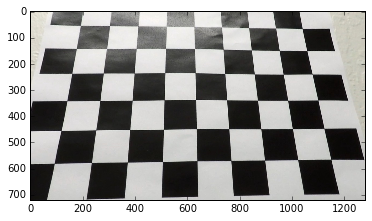

In [15]:
# Test camera calibration

image = mpimg.imread('camera_cal/calibration3.jpg')
plt.imshow(image)  
mtx, dist = camera_calibration('camera_cal/calibration*.jpg')
undist = cv2.undistort(image, mtx, dist)
# Show it

plt.imshow(undist)  





### Tracking 

### Pipeline

In [ ]:
# Pipeline
def pipeline(image):
    return image

### Sanity Check

### Smoothing

### Drawing

### Test Pipeline 1

In [ ]:
# Test pipeline on image 1
image = mpimg.imread('test_images/test1.jpg')

# Show it
plt.imshow(image)  

### Test Pipeline 2

In [ ]:
# Test pipeline on image 2
image = mpimg.imread('test_images/test2.jpg')

# Show it
plt.imshow(image)  

### Process image

In [ ]:
# ??? Redundant with Drawing 
def process_image(image):    
    return pipeline(image)


### Generate video output

In [ ]:
output_video = 'output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output_video, audio=False)
